In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [2]:
# 2. Load Dataset
df = pd.read_csv("sample_posts.csv")   # put your file name here

df.head()


,platform,post_id,posted_at,weekday,caption,hashtags,media_type,followers,views,likes,comments,shares,saves,engagement,engagement_rate,popularity_label
0,twitter,post_1,05-07-2024 14:00,3,deep post about photography 💪,#photography #ai #coding #startup,image,928,734,41,6,10,1,58,0.062500,medium
1,linkedin,post_2,31-01-2024 20:00,2,viral post about ai 🔥,#food #fashion #travel #ai,image,9907,13880,589,193,62,17,861,0.086908,high
2,tiktok,post_3,18-08-2024 15:00,6,amazing post about startup ✈️,#startup #fashion,image,20219,13902,567,179,103,17,866,0.042831,medium
3,twitter,post_4,07-02-2024 11:00,6,fresh post about coding 🔥,#fitness #startup #ai #travel,video,7306,5668,319,52,92,13,476,0.065152,high
4,instagram,post_5,06-12-2024 19:00,2,catchy post about music 🎯,#design #startup,video,13443,3976,240,40,23,3,306,0.022763,low


In [3]:
# Show basic info
print("Rows & Columns:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Rows & Columns: (10000, 16)

Missing Values:
 platform            0
post_id             0
posted_at           0
weekday             0
caption             0
hashtags            0
media_type          0
followers           0
views               0
likes               0
comments            0
shares              0
saves               0
engagement          0
engagement_rate     0
popularity_label    0
dtype: int64


In [4]:
df.describe()

,weekday,followers,views,likes,comments,shares,saves,engagement,engagement_rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.023500,13349.465500,10309.733300,455.411800,127.597500,77.524500,26.927500,687.461300,0.051587
std,2.007025,17087.987744,15552.779803,729.288943,214.528378,151.932805,52.776368,1076.641054,0.030801
min,0.000000,193.000000,43.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001105
25%,1.000000,4128.500000,2289.250000,94.000000,24.000000,12.000000,4.000000,146.000000,0.026025
50%,3.000000,8096.500000,5422.500000,224.500000,60.000000,33.000000,11.000000,349.000000,0.048986
75%,5.000000,16019.250000,12046.250000,517.000000,142.000000,82.250000,29.000000,786.000000,0.073791
max,6.000000,337098.000000,381408.000000,14457.000000,4288.000000,4254.000000,1136.000000,20420.000000,0.161757


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   platform          10000 non-null  object 
 1   post_id           10000 non-null  object 
 2   posted_at         10000 non-null  object 
 3   weekday           10000 non-null  int64  
 4   caption           10000 non-null  object 
 5   hashtags          10000 non-null  object 
 6   media_type        10000 non-null  object 
 7   followers         10000 non-null  int64  
 8   views             10000 non-null  int64  
 9   likes             10000 non-null  int64  
 10  comments          10000 non-null  int64  
 11  shares            10000 non-null  int64  
 12  saves             10000 non-null  int64  
 13  engagement        10000 non-null  int64  
 14  engagement_rate   10000 non-null  float64
 15  popularity_label  10000 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory

In [6]:
# Convert posted_at to datetime
df['posted_at'] = pd.to_datetime(df['posted_at'], errors='coerce')

# Fill missing values in text columns
df['caption'] = df['caption'].fillna("Unknown")
df['hashtags'] = df['hashtags'].fillna("")

# Fill missing numeric values with 0
num_cols = ['followers','views','likes','comments','shares','saves','engagement','engagement_rate']
df[num_cols] = df[num_cols].fillna(0)

# ✅ Check missing values after cleaning
df.isnull().sum()


platform               0
post_id                0
posted_at           5978
weekday                0
caption                0
hashtags               0
media_type             0
followers              0
views                  0
likes                  0
comments               0
shares                 0
saves                  0
engagement             0
engagement_rate        0
popularity_label       0
dtype: int64

In [7]:
# Convert posted_at and drop missing dates
df['posted_at'] = pd.to_datetime(df['posted_at'], errors='coerce')
df = df.dropna(subset=['posted_at'])

# Create simple features
df['hour'] = df['posted_at'].dt.hour           # hour of post
df['day'] = df['posted_at'].dt.day_name()      # day of week
df['caption_word_count'] = df['caption'].str.split().str.len()   # caption length
df['hashtag_count'] = df['hashtags'].str.split().str.len()       # hashtag count

# Show first 5 rows of new features
df[['posted_at','hour','day','caption_word_count','hashtag_count']].head()



,posted_at,hour,day,caption_word_count,hashtag_count
0,2024-05-07 14:00:00,14,Tuesday,5,4
3,2024-07-02 11:00:00,11,Tuesday,5,4
4,2024-06-12 19:00:00,19,Wednesday,5,2
7,2024-02-08 03:00:00,3,Thursday,5,3
9,2024-08-03 03:00:00,3,Saturday,5,1


In [8]:
# Define numeric features
num_features = ['followers','views','likes','comments','shares','saves',
                'caption_word_count','hashtag_count']

#  Preview numeric feature summary
df[num_features].describe()

,followers,views,likes,comments,shares,saves,caption_word_count,hashtag_count
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.0,4022.000000
mean,13161.010194,10028.499005,442.515167,125.305072,76.047240,26.529587,5.0,2.516410
std,16193.106844,14551.261722,708.687654,204.550546,152.648267,49.696507,0.0,1.108222
min,336.000000,43.000000,1.000000,0.000000,0.000000,0.000000,5.0,1.000000
25%,4088.500000,2214.500000,91.000000,24.000000,12.000000,3.000000,5.0,2.000000
50%,8046.500000,5376.500000,225.000000,61.000000,32.000000,11.000000,5.0,2.000000
75%,16129.750000,11988.250000,517.000000,138.750000,82.000000,29.000000,5.0,4.000000
max,212088.000000,206119.000000,14457.000000,3495.000000,3103.000000,944.000000,5.0,4.000000


In [9]:
 #Unique categories
print("Platforms:", df['platform'].unique())
print("Media types:", df['media_type'].unique())


Platforms: ['twitter' 'instagram' 'linkedin' 'tiktok']
Media types: ['image' 'video' 'carousel' 'text']


In [10]:
# ---------------------------
#  Simple Feature Extraction (Fixed)
# ---------------------------

# 1. Numeric features
numeric_features = ['followers', 'views', 'likes', 'comments', 'shares', 'saves',
                    'caption_word_count', 'hashtag_count']
X_numeric = df[numeric_features]

# 2. Categorical features (convert to dummies easily)
X_categorical = pd.get_dummies(df[['platform','media_type']], drop_first=True)

# 3. Text features (create combined_text first, then length)
df['combined_text'] = df['caption'].astype(str) + " " + df['hashtags'].astype(str)
df['text_length'] = (
    df['caption'].fillna('').str.split().str.len() +
    df['hashtags'].fillna('').str.split().str.len()
)

# Final feature set
X = pd.concat([X_numeric, X_categorical, df[['text_length']]], axis=1)

X.head()


,followers,views,likes,comments,shares,saves,caption_word_count,hashtag_count,platform_linkedin,platform_tiktok,platform_twitter,media_type_image,media_type_text,media_type_video,text_length
0,928,734,41,6,10,1,5,4,False,False,True,True,False,False,9
3,7306,5668,319,52,92,13,5,4,False,False,True,False,False,True,9
4,13443,3976,240,40,23,3,5,2,False,False,False,False,False,True,7
7,8216,2810,189,52,14,5,5,3,True,False,False,False,False,True,8
9,2255,1595,55,30,5,9,5,1,False,True,False,False,False,False,6


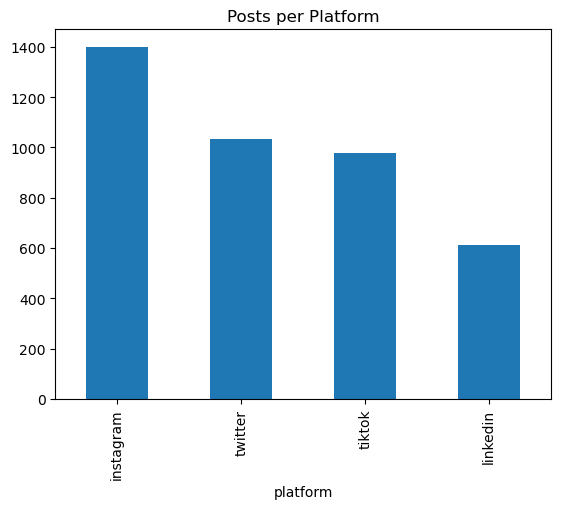

In [11]:
# 1. Posts per platform
df['platform'].value_counts().plot(kind='bar')
plt.title("Posts per Platform")
plt.show()


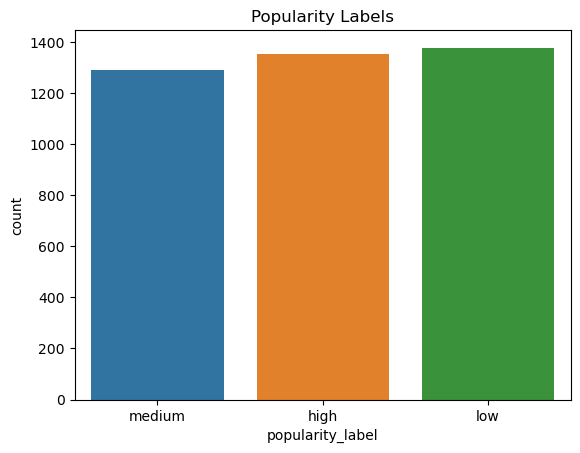

In [12]:
# 2. Popularity categories
sns.countplot(x='popularity_label', data=df)
plt.title("Popularity Labels")
plt.show()


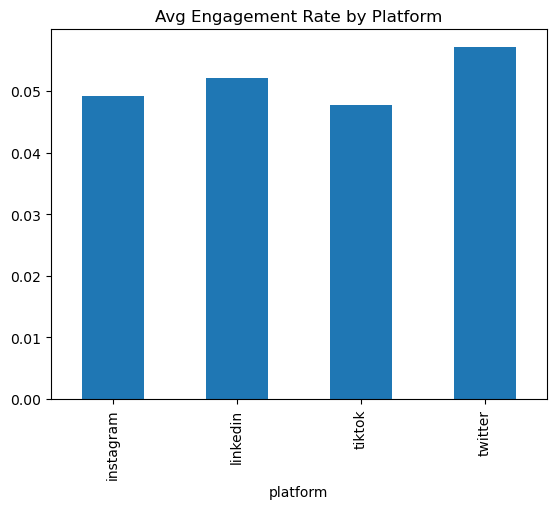

In [13]:
# 3 Average engagement rate by platform
df.groupby('platform')['engagement_rate'].mean().plot(kind='bar', title="Avg Engagement Rate by Platform")
plt.show()

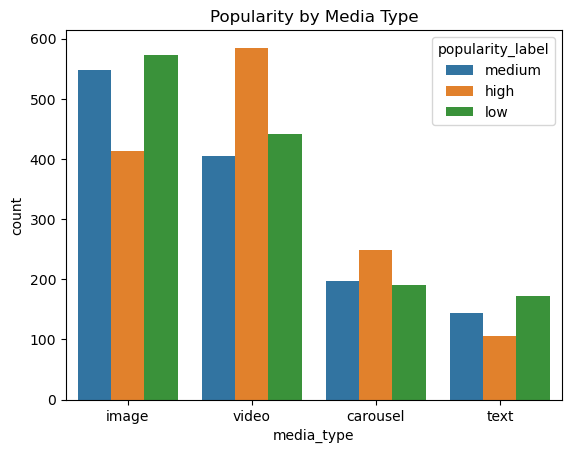

In [14]:
# 4. Popularity by Media Type
sns.countplot(x='media_type', hue='popularity_label', data=df)
plt.title("Popularity by Media Type")
plt.show()


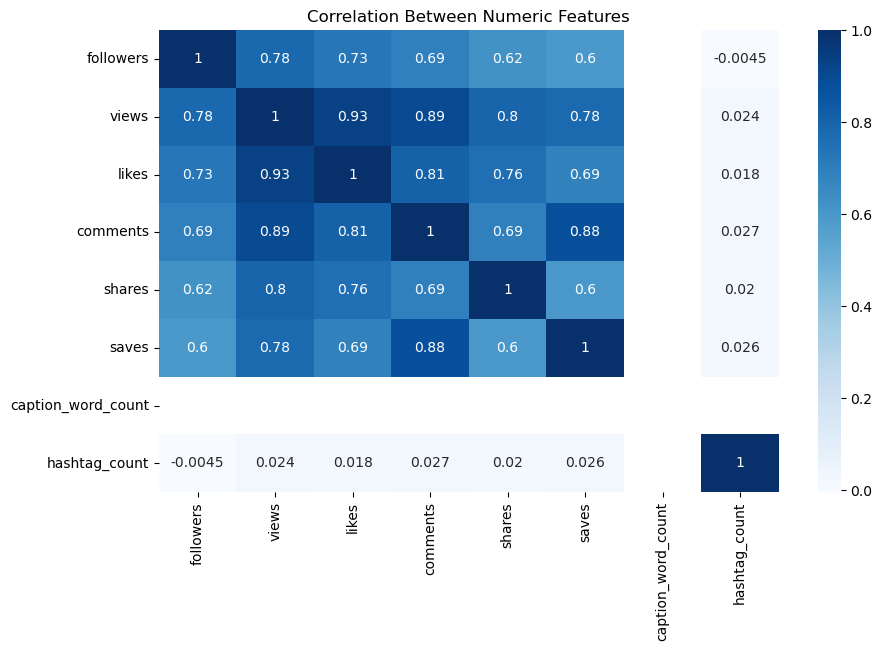

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Numeric Features")
plt.show()


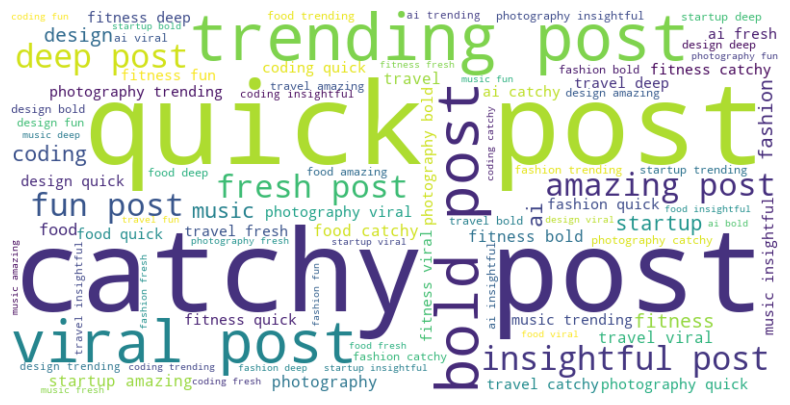

In [16]:
# Combine all captions into one text
text = " ".join(df['caption'])

# Create the wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

# Show the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Modeling
### Regression: RandomForestRegressor to predict engagement rate.


#### Step 1: Import Libraries

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import joblib
import os


#### Step 2: Select Features & Target

In [18]:
# Define numeric and categorical columns
NUMERIC = ['followers', 'views', 'likes', 'comments', 'shares', 'saves', 'engagement']
CATEGORICAL = ['platform', 'media_type', 'weekday']

# Features (X) and target (y)
X_reg = df[NUMERIC + CATEGORICAL]
y_reg = df['engagement_rate']

print(X_reg.head())
print(y_reg.head())

   followers  views  likes  comments  shares  saves  engagement   platform  \
0        928    734     41         6      10      1          58    twitter   
3       7306   5668    319        52      92     13         476    twitter   
4      13443   3976    240        40      23      3         306  instagram   
7       8216   2810    189        52      14      5         260   linkedin   
9       2255   1595     55        30       5      9          99     tiktok   

  media_type  weekday  
0      image        3  
3      video        6  
4      video        2  
7      video        6  
9   carousel        5  
0    0.062500
3    0.065152
4    0.022763
7    0.031646
9    0.043902
Name: engagement_rate, dtype: float64


#### Step 3: Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3217, 10)
Test size: (805, 10)


#### Step 4: Build Preprocessor

In [20]:
# Numeric pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipe, NUMERIC),
    ('cat', cat_pipe, CATEGORICAL)
])


#### Step 5: Build Model Pipeline

In [21]:
regressor = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


#### Step 6: Train Model

In [22]:
regressor.fit(X_train, y_train)
print("Model trained successfully!")


Model trained successfully!


#### Step 7: Predict & Evaluate

In [23]:
y_pred = regressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 0.0017520172733194784
R2: 0.9883722667354706


#### Step 8: Plot Results

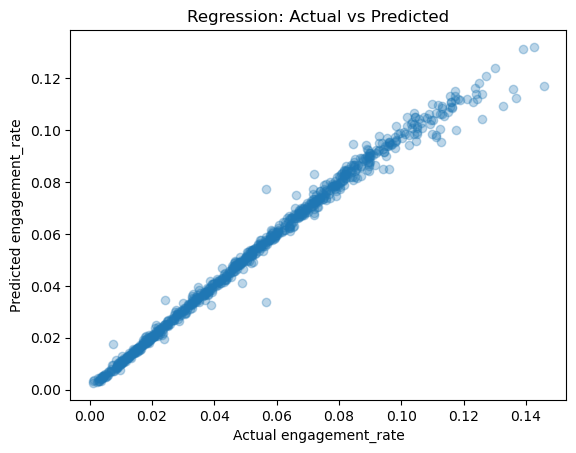

In [24]:
os.makedirs("reports", exist_ok=True)

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual engagement_rate")
plt.ylabel("Predicted engagement_rate")
plt.title("Regression: Actual vs Predicted")
plt.savefig("reports/regression_scatter.png")
plt.show()


#### Step 9: Save Model

In [25]:
joblib.dump(regressor, "regressor_model.joblib")
print(" Model saved as regressor_model.joblib")


 Model saved as regressor_model.joblib


### Classification: LogisticRegression to predict popularity label.

#### Step 1: Create Popular Label

In [26]:
# Step 1: Create binary target column
threshold = df['engagement_rate'].median()
df['popular'] = (df['engagement_rate'] > threshold).astype(int)

print(df[['engagement_rate', 'popular']].head(10))
print("Class distribution:\n", df['popular'].value_counts())


    engagement_rate  popular
0          0.062500        1
3          0.065152        1
4          0.022763        0
7          0.031646        0
9          0.043902        0
13         0.054247        1
14         0.022222        0
15         0.022094        0
18         0.010614        0
20         0.019258        0
Class distribution:
 popular
1    2011
0    2011
Name: count, dtype: int64


#### Step 2: Select Features & Split

In [27]:
from sklearn.model_selection import train_test_split

# Features and target
NUMERIC = ['followers', 'views', 'likes', 'comments', 'shares', 'saves', 'engagement']
CATEGORICAL = ['platform', 'media_type', 'weekday']

X_clf = df[NUMERIC + CATEGORICAL]
y_clf = df['popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (3217, 10)  Test size: (805, 10)


#### Step 3: Preprocessing

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numeric pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipe, NUMERIC),
    ('cat', cat_pipe, CATEGORICAL)
])


#### Step 4: Train Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('pre', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

clf.fit(X_train, y_train)

print("Training completed")


Training completed


#### Step 5: Evaluate Model

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       403
           1       0.97      0.98      0.97       402

    accuracy                           0.97       805
   macro avg       0.97      0.97      0.97       805
weighted avg       0.97      0.97      0.97       805



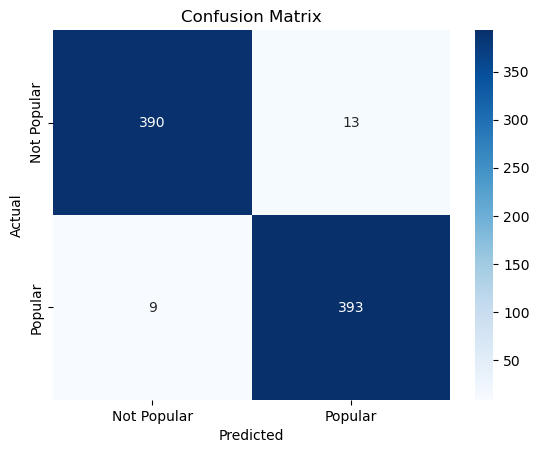

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Step 6: Save Model

In [31]:
import joblib
joblib.dump(clf, "classifier_model.joblib")
print("Model saved as classifier_model.joblib")


Model saved as classifier_model.joblib
